## Descriptive Statistics 

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import seaborn as sns
from scipy.stats import norm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn import linear_model
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()

In [4]:
rawdata = pd.read_csv('regression_2017.csv')

In [6]:
rawdata.head()

,Borough code,Borough name,Ward Code,Ward name,Population,Density,65+_age,Deprivation,HR_buildings,Heritage,...,Fire_casualties,1st_pump_attendance,one_pump_attendance_adjust,2nd_pump_attendance,two_pump_attendance_adjust,3rd_pump_attendance,three_pump_attendance_adjust,HFSV,FSR_Inspection,Visual_audit
0,E09000002,Barking and Dagenham,E05000026,Abbey,15050,11731,704,66,13,8,...,0,5:28,328,6:07,367,7:27,447,225,36,113
1,E09000002,Barking and Dagenham,E05000027,Alibon,11250,8245,1028,63,0,0,...,2,5:37,337,6:44,404,8:15,495,67,1,39
2,E09000002,Barking and Dagenham,E05000028,Becontree,15050,11684,1216,64,7,0,...,2,6:24,384,6:56,416,9:00,540,103,18,37
3,E09000002,Barking and Dagenham,E05000029,Chadwell Heath,11000,3250,1556,67,2,10,...,2,6:43,403,7:39,459,6:36,396,199,15,42
4,E09000002,Barking and Dagenham,E05000030,Eastbrook,11050,3202,1512,64,2,6,...,5,5:02,302,5:43,343,9:03,543,156,11,44


In [7]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Borough code                  625 non-null    object
 1   Borough name                  625 non-null    object
 2   Ward Code                     625 non-null    object
 3   Ward name                     625 non-null    object
 4   Population                    625 non-null    int64 
 5   Density                       625 non-null    int64 
 6   65+_age                       625 non-null    int64 
 7   Deprivation                   625 non-null    int64 
 8   HR_buildings                  625 non-null    int64 
 9   Heritage                      625 non-null    int64 
 10  local_concerns                625 non-null    int64 
 11  Student                       625 non-null    int64 
 12  crime                         625 non-null    int64 
 13  Over_crowding       

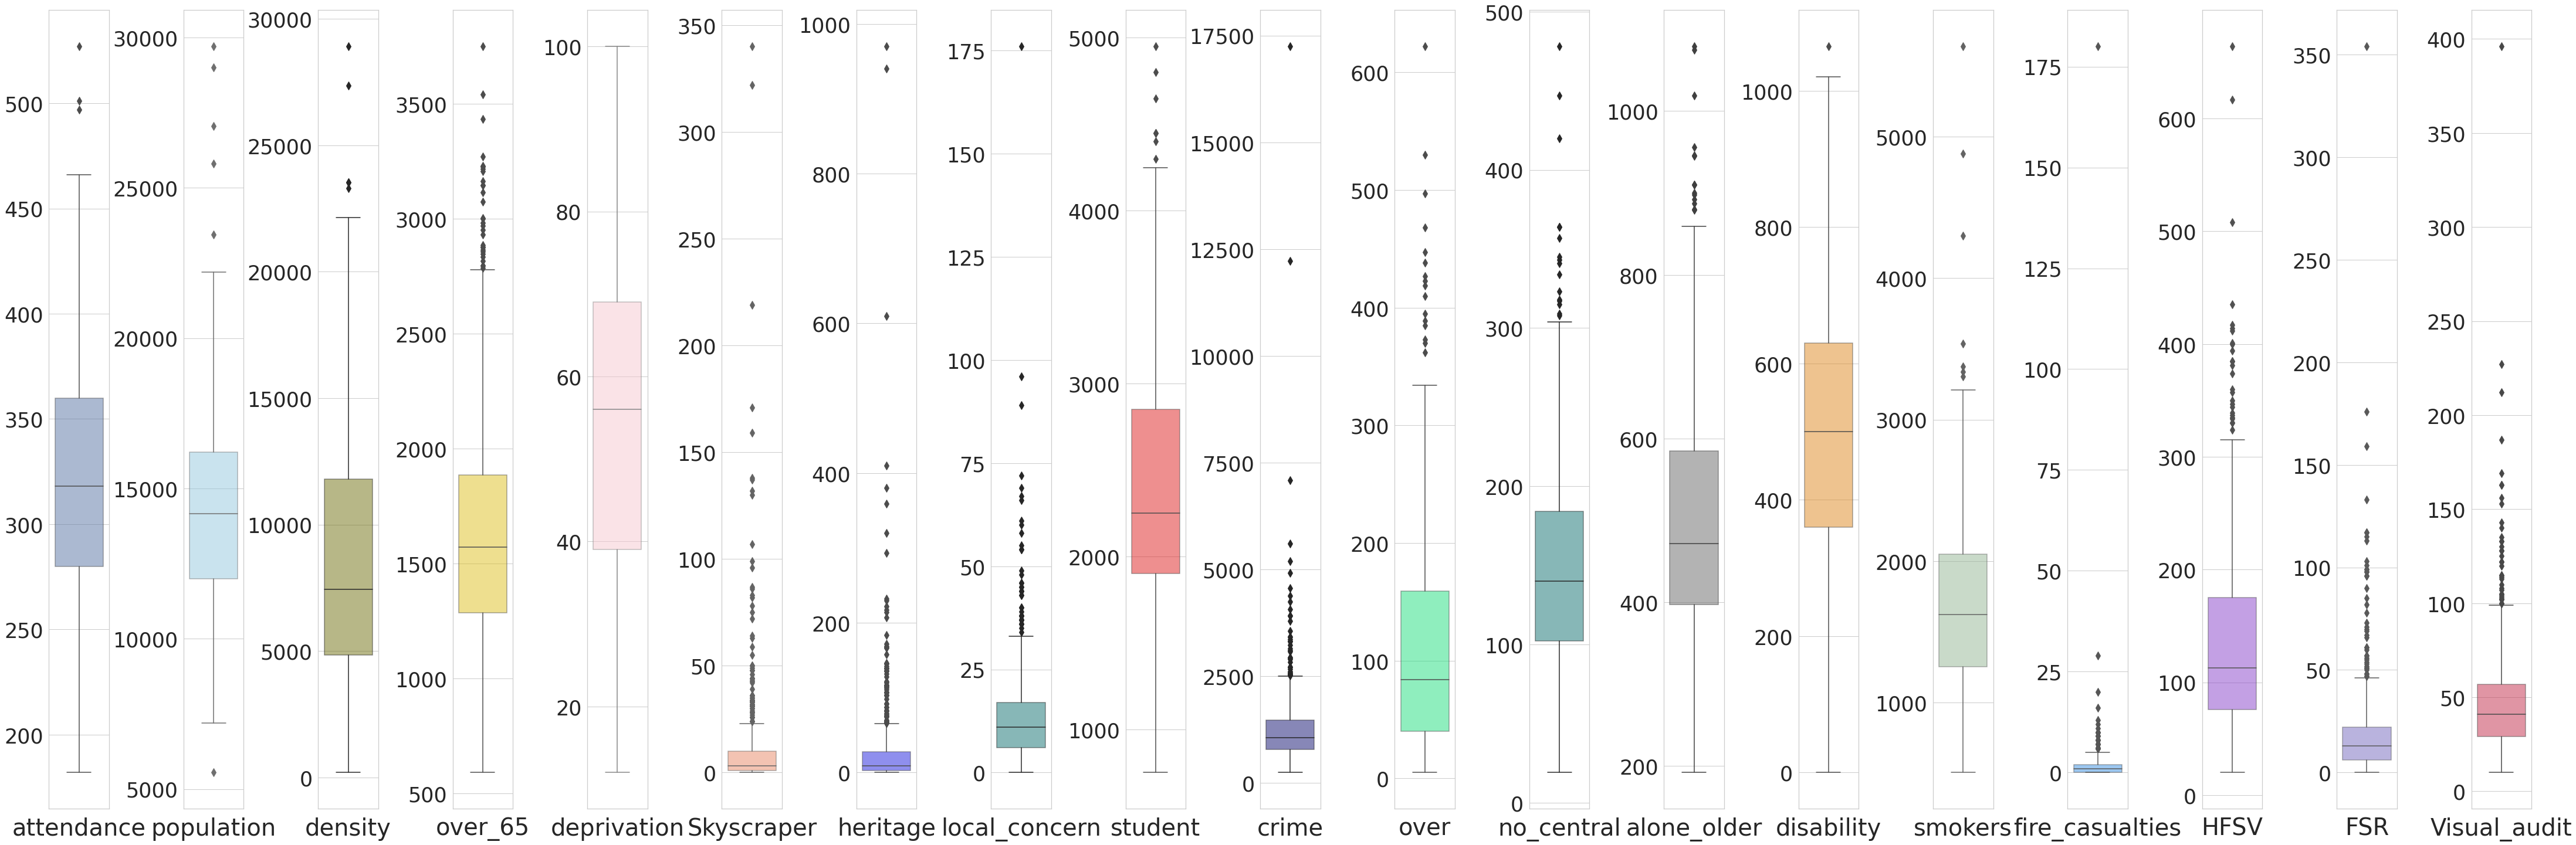

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,19, figsize=(60, 20))
sns.boxplot(y="one_pump_attendance_adjust",ax=ax[0],data= rawdata,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='attendance', ylabel='')
sns.boxplot(y="Population",ax=ax[1],color="skyblue",data= rawdata,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='population', ylabel='')
sns.boxplot(y="Density",ax=ax[2],color="olive",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='density', ylabel='')
sns.boxplot(y="65+_age",ax=ax[3],color="gold",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='over_65', ylabel='')
sns.boxplot(y="Deprivation",ax=ax[4],color="pink",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='deprivation', ylabel='')
sns.boxplot(y="HR_buildings",ax=ax[5],color="coral",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='Skyscraper', ylabel='')
sns.boxplot(y="Heritage",ax=ax[6],color="blue",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='heritage', ylabel='')
sns.boxplot(y="local_concerns",ax=ax[7],color="teal",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='local_concern', ylabel='')
sns.boxplot(y="Student",ax=ax[8],color="red",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='student', ylabel='')
sns.boxplot(y="crime",ax=ax[9],color="navy",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='crime', ylabel='')
sns.boxplot(y="Over_crowding",ax=ax[10],color="springgreen",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='over_crow', ylabel='')
sns.boxplot(y="No_central_heat",ax=ax[11],color="teal",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='no_central', ylabel='')
sns.boxplot(y="older_alone",ax=ax[12],color="dimgray",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='alone_older', ylabel='')
sns.boxplot(y="Disability",ax=ax[13],color="darkorange",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='disability', ylabel='')
sns.boxplot(y="Smokers",ax=ax[14],color="darkseagreen",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='smokers', ylabel='')
sns.boxplot(y="Fire_casualties",ax=ax[15],color="dodgerblue",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='fire_casualties', ylabel='')
sns.boxplot(y="HFSV",ax=ax[16],color="blueviolet",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='HFSV', ylabel='')
sns.boxplot(y="FSR_Inspection",ax=ax[17],color="slateblue",data=rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='FSR', ylabel='')
sns.boxplot(y="Visual_audit",ax=ax[18],color="crimson",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='Visual_audit', ylabel='')

ax[0].set_xlabel(xlabel='attendance', size=40)
ax[1].set_xlabel(xlabel='population', size=40)
ax[2].set_xlabel(xlabel='density', size=40)
ax[3].set_xlabel(xlabel='over_65', size=40)
ax[4].set_xlabel(xlabel='deprivation', size=40)
ax[5].set_xlabel(xlabel='Skyscraper', size=40)
ax[6].set_xlabel(xlabel='heritage', size=40)
ax[7].set_xlabel(xlabel='local_concern', size=40)
ax[8].set_xlabel(xlabel='student', size=40)
ax[9].set_xlabel(xlabel='crime', size=40)
ax[10].set_xlabel(xlabel='over', size=40)
ax[11].set_xlabel(xlabel='no_central', size=40)
ax[12].set_xlabel(xlabel='alone_older', size=40)
ax[13].set_xlabel(xlabel='disability', size=40)
ax[14].set_xlabel(xlabel='smokers', size=40)
ax[15].set_xlabel(xlabel='fire_casualties', size=40)
ax[16].set_xlabel(xlabel='HFSV', size=40)
ax[17].set_xlabel(xlabel='FSR', size=40)
ax[18].set_xlabel(xlabel='Visual_audit', size=40)
#plt.xticks(fontsize=14, rotation=90)

for x in range(19):
    ax[x].tick_params(axis='both', which='major', labelsize=35)
    ax[x].tick_params(axis='both', which='minor', labelsize=300)
f.tight_layout(pad=0.5)
#f.savefig("boxplot_with_outliners")


In [9]:
# droping outliniers 
from scipy import stats
print(rawdata.shape)


z = np.abs(stats.zscore(rawdata.one_pump_attendance_adjust))
threshold = 3
print(np.where(z > 3))
cleandata = rawdata[(z < 3)]
print(cleandata.shape)

(625, 28)
(array([176, 304, 379]),)
(622, 28)


In [10]:
cleandata.reset_index(drop=True, inplace=True)
print(cleandata)

    Borough code          Borough name  Ward Code       Ward name  Population  \
0      E09000002  Barking and Dagenham  E05000026           Abbey       15050   
1      E09000002  Barking and Dagenham  E05000027          Alibon       11250   
2      E09000002  Barking and Dagenham  E05000028       Becontree       15050   
3      E09000002  Barking and Dagenham  E05000029  Chadwell Heath       11000   
4      E09000002  Barking and Dagenham  E05000030       Eastbrook       11050   
..           ...                   ...        ...             ...         ...   
617    E09000033           Westminster  E05000646  Vincent Square       11650   
618    E09000033           Westminster  E05000647         Warwick       10350   
619    E09000033           Westminster  E05000648      Westbourne       13850   
620    E09000033           Westminster  E05000649        West End       13100   
621    E09000001        City of London  E05000000  City of London        7400   

     Density  65+_age  Depr

In [11]:
print(cleandata.columns.values)

['Borough code' 'Borough name' 'Ward Code' 'Ward name' 'Population'
 'Density' '65+_age' 'Deprivation' 'HR_buildings' 'Heritage'
 'local_concerns' 'Student' 'crime' 'Over_crowding' 'No_central_heat'
 'older_alone' 'Disability' 'Smokers' 'Fire_casualties'
 '1st_pump_attendance' 'one_pump_attendance_adjust' '2nd_pump_attendance'
 'two_pump_attendance_adjust' '3rd_pump_attendance'
 'three_pump_attendance_adjust' 'HFSV' 'FSR_Inspection' 'Visual_audit']


In [12]:
cleandata.head()

,Borough code,Borough name,Ward Code,Ward name,Population,Density,65+_age,Deprivation,HR_buildings,Heritage,...,Fire_casualties,1st_pump_attendance,one_pump_attendance_adjust,2nd_pump_attendance,two_pump_attendance_adjust,3rd_pump_attendance,three_pump_attendance_adjust,HFSV,FSR_Inspection,Visual_audit
0,E09000002,Barking and Dagenham,E05000026,Abbey,15050,11731,704,66,13,8,...,0,5:28,328,6:07,367,7:27,447,225,36,113
1,E09000002,Barking and Dagenham,E05000027,Alibon,11250,8245,1028,63,0,0,...,2,5:37,337,6:44,404,8:15,495,67,1,39
2,E09000002,Barking and Dagenham,E05000028,Becontree,15050,11684,1216,64,7,0,...,2,6:24,384,6:56,416,9:00,540,103,18,37
3,E09000002,Barking and Dagenham,E05000029,Chadwell Heath,11000,3250,1556,67,2,10,...,2,6:43,403,7:39,459,6:36,396,199,15,42
4,E09000002,Barking and Dagenham,E05000030,Eastbrook,11050,3202,1512,64,2,6,...,5,5:02,302,5:43,343,9:03,543,156,11,44


In [13]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Borough code                  622 non-null    object
 1   Borough name                  622 non-null    object
 2   Ward Code                     622 non-null    object
 3   Ward name                     622 non-null    object
 4   Population                    622 non-null    int64 
 5   Density                       622 non-null    int64 
 6   65+_age                       622 non-null    int64 
 7   Deprivation                   622 non-null    int64 
 8   HR_buildings                  622 non-null    int64 
 9   Heritage                      622 non-null    int64 
 10  local_concerns                622 non-null    int64 
 11  Student                       622 non-null    int64 
 12  crime                         622 non-null    int64 
 13  Over_crowding       

## Histogram

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


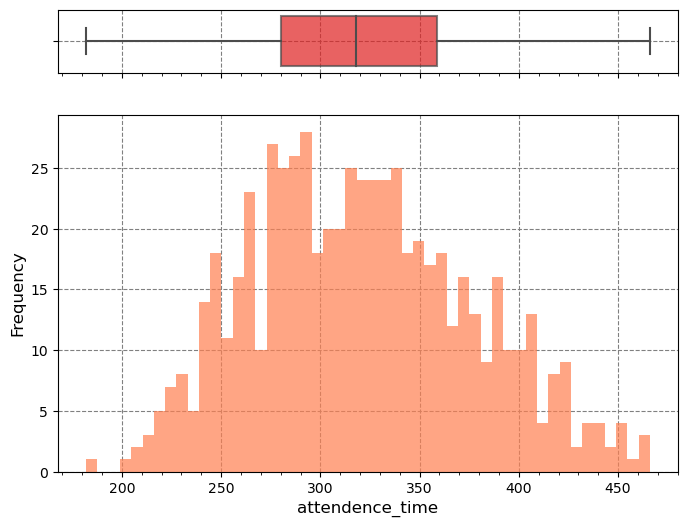

In [14]:
plt.rcParams.update(plt.rcParamsDefault)

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
data = cleandata['one_pump_attendance_adjust']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(8,6))
 
# Add a graph in each part
sns.boxplot(data, ax=ax_box,color="Red",boxprops=dict(alpha=.7))
plt.hist(data, bins=50,color="Coral", alpha=0.7)

 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

#Figure characteristics

## place a text box in bottom right in axes coords
#ax_hist.text(0.51, 0.05, title, transform=ax.transAxes, fontsize=11,
        #verticalalignment='bottom', bbox=props2)

plt.ylabel('Frequency', fontsize=12)
plt.xlabel("attendence_time",fontsize=12)
ax_hist.xaxis.set_minor_locator(AutoMinorLocator())
ax_hist.set_axisbelow(True)
ax_hist.grid(color='gray', linestyle='dashed')
ax_box.set_axisbelow(True)
ax_box.grid(color='gray', linestyle='dashed')
#f.savefig("histogram_changefirst5")

In [15]:
df_cleandata=cleandata.drop(['Borough code','Borough name','Ward Code','Ward name','1st_pump_attendance','2nd_pump_attendance','3rd_pump_attendance','two_pump_attendance_adjust','three_pump_attendance_adjust'],axis=1)
df_cleandata

,Population,Density,65+_age,Deprivation,HR_buildings,Heritage,local_concerns,Student,crime,Over_crowding,No_central_heat,older_alone,Disability,Smokers,Fire_casualties,one_pump_attendance_adjust,HFSV,FSR_Inspection,Visual_audit
0,15050,11731,704,66,13,8,30,2700,2352,253,185,209,405,1999,0,328,225,36,113
1,11250,8245,1028,63,0,0,5,2650,883,74,92,402,625,1498,2,337,67,1,39
2,15050,11684,1216,64,7,0,11,3150,1326,98,136,426,595,1884,2,384,103,18,37
3,11000,3250,1556,67,2,10,11,2300,890,39,107,584,520,1421,2,403,199,15,42
4,11050,3202,1512,64,2,6,15,2150,805,35,79,484,475,1542,5,302,156,11,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,11650,17043,1642,60,78,66,12,1600,1129,52,244,623,495,1275,0,271,139,25,40
618,10350,18045,1304,43,43,55,17,900,1517,54,239,553,380,1164,0,318,39,38,30
619,13850,20475,1360,99,43,10,19,2500,1235,168,160,427,885,1533,0,268,236,23,56
620,13100,6551,1438,48,322,970,36,850,17244,66,420,599,305,1450,9,334,180,159,100


## Correlation Matrics

Text(0.5, 1.0, 'Correlation Matrix')

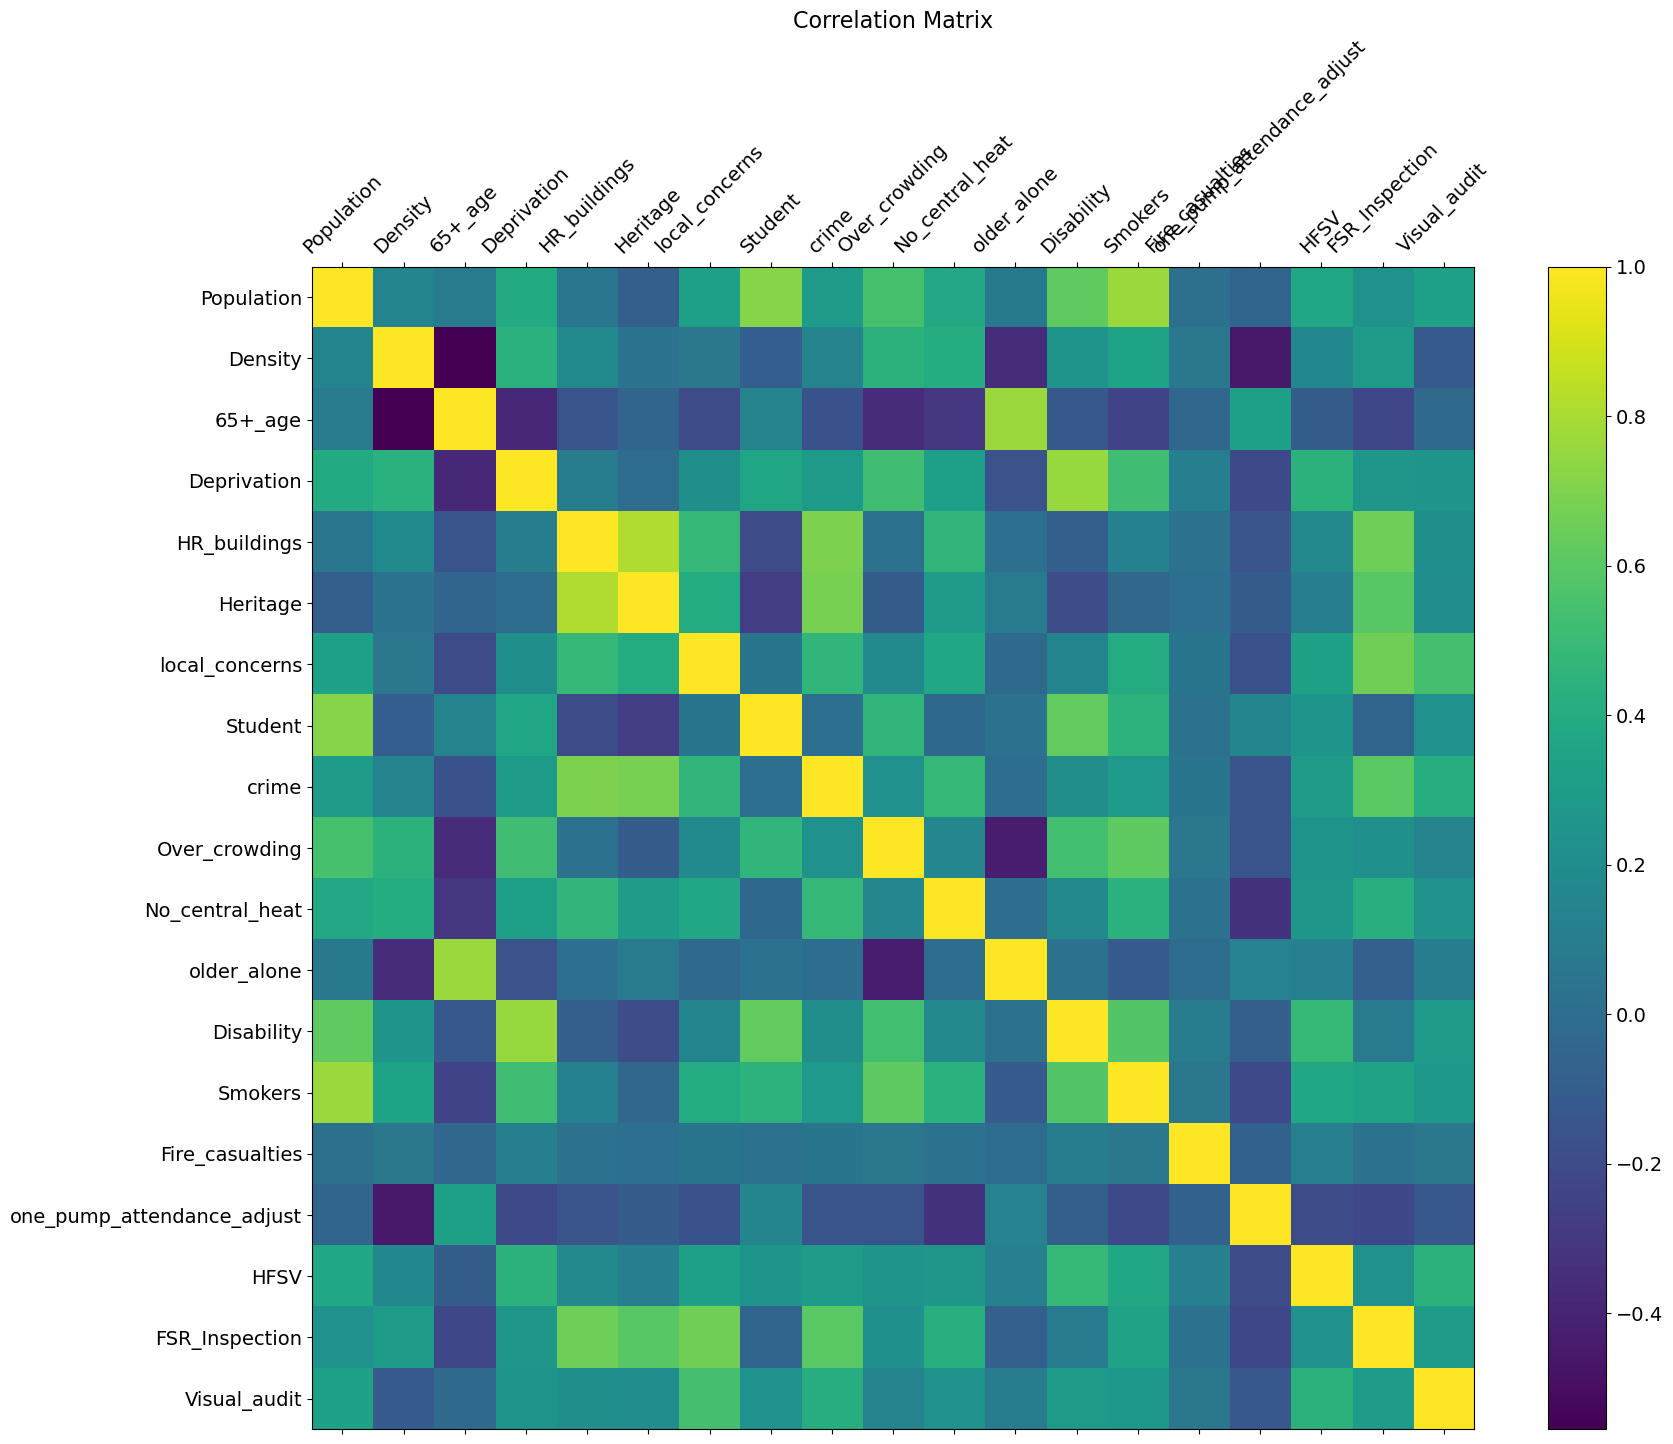

In [16]:
df = df_cleandata
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

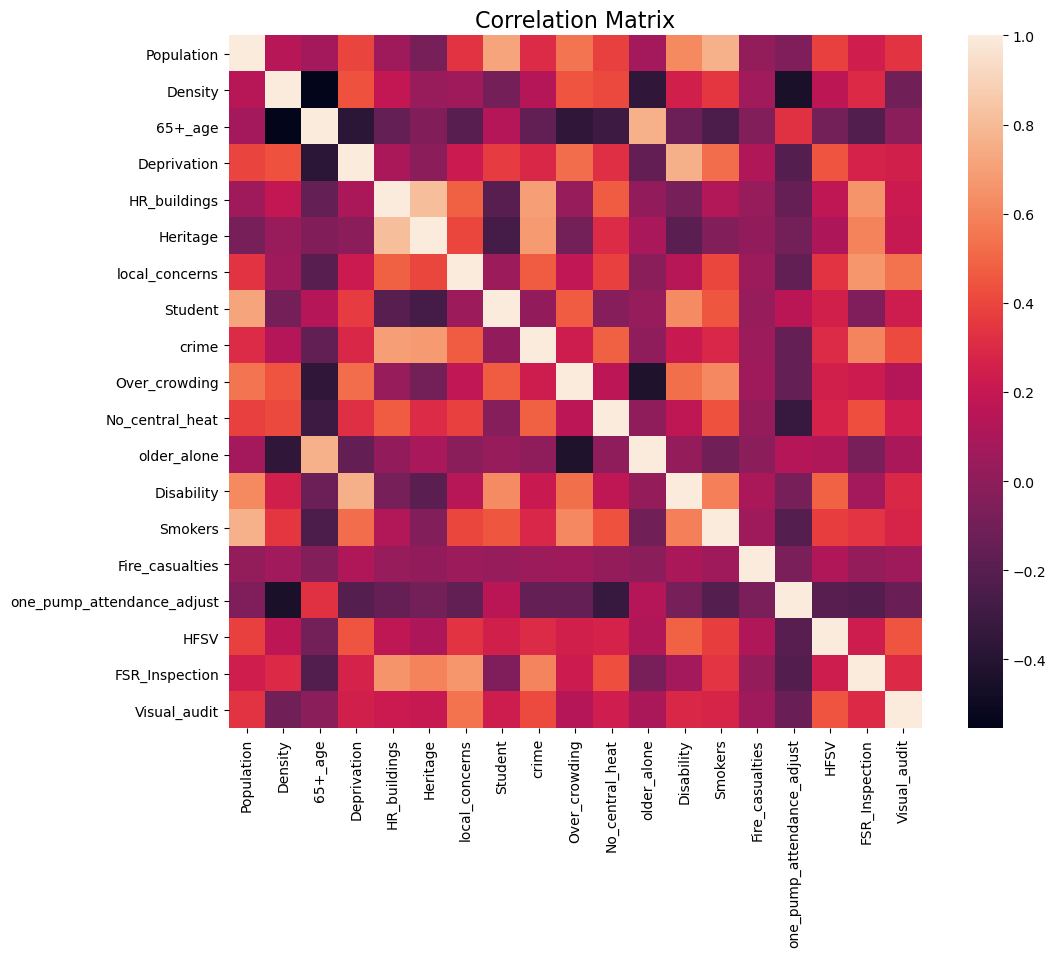

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import pandas

 
corrmat = df_cleandata.corr()
 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

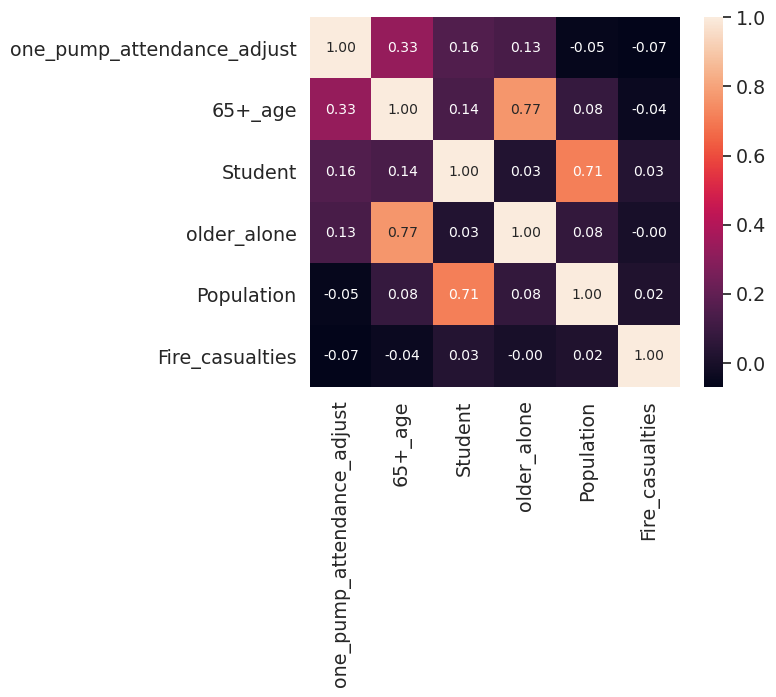

In [18]:
##取对one_pump_attendance影响最大的几个特征并排序
k=6
cols = corrmat.nlargest(k, 'one_pump_attendance_adjust')['one_pump_attendance_adjust'].index
cm = np.corrcoef(df_cleandata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

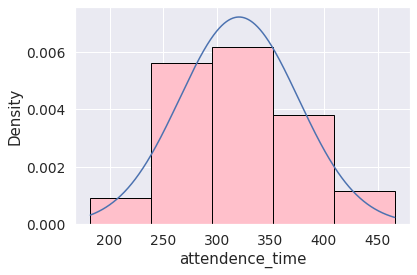

In [19]:
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant


picture=df_cleandata['one_pump_attendance_adjust']
picture_l=np.linspace(min(picture),max(picture),1000)
std=np.std(picture)
mean=np.mean(picture)
fit=stats.norm.pdf(picture_l,mean,std)
num_bins=5
plt.plot(picture_l,fit)
plt.hist(picture,num_bins,density=True,color='pink',edgecolor='black')
plt.xlabel('attendence_time')
plt.ylabel('Density')
plt.show()

## VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=10):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [38]:
print(df)

     Population  Density  65+_age  Deprivation  HR_buildings  Heritage  \
0         15050    11731      704           66            13         8   
1         11250     8245     1028           63             0         0   
2         15050    11684     1216           64             7         0   
3         11000     3250     1556           67             2        10   
4         11050     3202     1512           64             2         6   
..          ...      ...      ...          ...           ...       ...   
617       11650    17043     1642           60            78        66   
618       10350    18045     1304           43            43        55   
619       13850    20475     1360           99            43        10   
620       13100     6551     1438           48           322       970   
621        7400     2350     1400           40           171       610   

     local_concerns  Student  crime  Over_crowding  No_central_heat  \
0                30     2700   2352     

In [39]:
dw=df.dropna()
print(dw)

     Population  Density  65+_age  Deprivation  HR_buildings  Heritage  \
0         15050    11731      704           66            13         8   
1         11250     8245     1028           63             0         0   
2         15050    11684     1216           64             7         0   
3         11000     3250     1556           67             2        10   
4         11050     3202     1512           64             2         6   
..          ...      ...      ...          ...           ...       ...   
617       11650    17043     1642           60            78        66   
618       10350    18045     1304           43            43        55   
619       13850    20475     1360           99            43        10   
620       13100     6551     1438           48           322       970   
621        7400     2350     1400           40           171       610   

     local_concerns  Student  crime  Over_crowding  No_central_heat  \
0                30     2700   2352     

In [40]:
# using VIF on the bike_rental dataset
predictors_datanew = dw.drop('one_pump_attendance_adjust', axis=1)
response_datanew = dw['one_pump_attendance_adjust']

In [41]:
dw.columns

Index(['Population', 'Density', '65+_age', 'Deprivation', 'HR_buildings',
       'Heritage', 'local_concerns', 'Student', 'crime', 'Over_crowding',
       'No_central_heat', 'older_alone', 'Disability', 'Smokers',
       'Fire_casualties', 'one_pump_attendance_adjust', 'HFSV',
       'FSR_Inspection', 'Visual_audit'],
      dtype='object')

In [42]:
dw_predictors_selected_VIF = drop_column_using_vif_(dw.drop('one_pump_attendance_adjust', axis=1))
print("The columns remaining after VIF selection are:")
print(dw_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['Population', 'Density', '65+_age', 'Deprivation', 'HR_buildings',
       'Heritage', 'local_concerns', 'Student', 'crime', 'Over_crowding',
       'No_central_heat', 'older_alone', 'Disability', 'Smokers',
       'Fire_casualties', 'HFSV', 'FSR_Inspection', 'Visual_audit'],
      dtype='object')


## Multiple Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=dw_predictors_selected_VIF, y=response_datanew)

LinearRegression()

In [44]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": dw_predictors_selected_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  346.00126233881275
                var      coef
0        Population -0.000138
1           Density -0.003760
2           65+_age  0.017382
3       Deprivation  0.057294
4      HR_buildings  0.217598
5          Heritage -0.027367
6    local_concerns  0.073572
7           Student  0.012455
8             crime  0.000966
9     Over_crowding  0.000495
10  No_central_heat -0.077568
11      older_alone -0.039313
12       Disability  0.019577
13          Smokers -0.007472
14  Fire_casualties -0.230531
15             HFSV -0.051098
16   FSR_Inspection -0.050707
17     Visual_audit -0.280755


In [45]:
print('R2:')
lr.score(X=dw_predictors_selected_VIF, y=response_datanew)

R2:


0.28743868813621987

In [46]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=response_datanew, exog=sm.add_constant(dw_predictors_selected_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     one_pump_attendance_adjust   R-squared:                       0.287
Model:                                    OLS   Adj. R-squared:                  0.266
Method:                         Least Squares   F-statistic:                     13.51
Date:                        Sat, 21 Aug 2021   Prob (F-statistic):           4.01e-34
Time:                                15:53:51   Log-Likelihood:                -3274.4
No. Observations:                         622   AIC:                             6587.
Df Residuals:                             603   BIC:                             6671.
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             346.0013     13.935     24.829      0.000     318.634     373.369
Population         -0.0001      0.002     -0.079      0.937      -0.004       0.003
Density            -0.0038      0.001     -6.331      0.000      -0.005      -0.003
65+_age             0.0174      0.009      2.009      0.045       0.000       0.034
Deprivation         0.0573      0.182      0.315      0.753      -0.300       0.415
HR_buildings        0.2176      0.139      1.569      0.117      -0.055       0.490
Heritage           -0.0274      0.053     -0.518      0.605      -0.131       0.076
local_concerns      0.0736      0.238      0.310      0.757      -0.393       0.540
Student             0.0125      0.005      2.439      0.015       0.002       0.022
crime               0.0010      0.003      0.290      0.772      -0.006       0.008
Over_crowding       0.0005      0.036      0.014      0.989      -0.070       0.071
No_central_heat    -0.0776      0.047     -1.637      0.102      -0.171       0.015
older_alone        -0.0393      0.027     -1.447      0.148      -0.093       0.014
Disability          0.0196      0.022      0.876      0.382      -0.024       0.063
Smokers            -0.0075      0.006     -1.222      0.222      -0.019       0.005
Fire_casualties    -0.2305      0.256     -0.902      0.368      -0.733       0.271
HFSV               -0.0511      0.029     -1.760      0.079      -0.108       0.006
FSR_Inspection     -0.0507      0.134     -0.377      0.706      -0.315       0.213
Visual_audit       -0.2808      0.082     -3.428      0.001      -0.442      -0.120
==============================================================================
Omnibus:                        5.404   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                3.878
Skew:                          -0.024   Prob(JB):                        0.144
Kurtosis:                       2.616   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

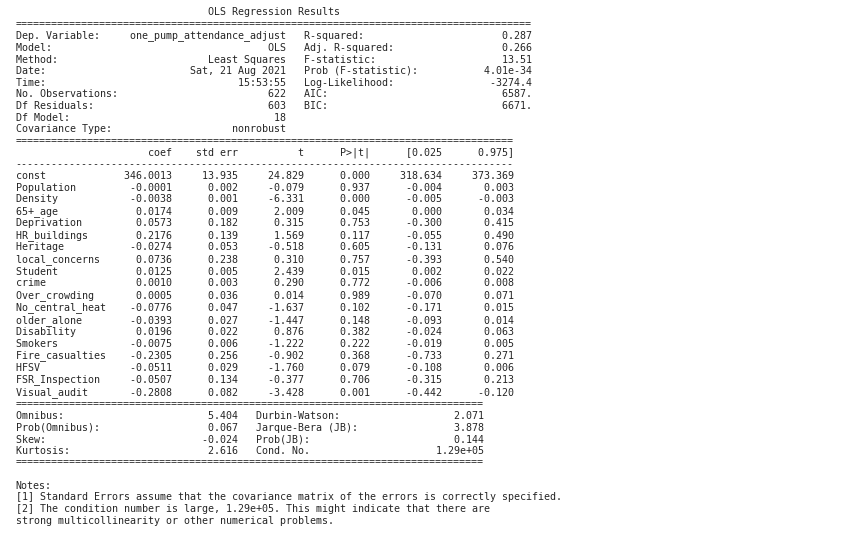

In [47]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(regressor_OLS.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Standard.png',dpi=300)

In [52]:
dw_predictors_selected_regression=dw_predictors_selected_VIF.drop(['Deprivation','HR_buildings','Heritage','local_concerns','crime','Over_crowding','older_alone','Disability','Smokers','Fire_casualties','HFSV','FSR_Inspection','No_central_heat'],axis=1)
dw_predictors_selected_regression

,Population,Density,65+_age,Student,Visual_audit
0,15050,11731,704,2700,113
1,11250,8245,1028,2650,39
2,15050,11684,1216,3150,37
3,11000,3250,1556,2300,42
4,11050,3202,1512,2150,44
...,...,...,...,...,...
617,11650,17043,1642,1600,40
618,10350,18045,1304,900,30
619,13850,20475,1360,2500,56
620,13100,6551,1438,850,100


In [53]:
regressor_OLS_new = sm.OLS(endog=response_datanew, exog=sm.add_constant(dw_predictors_selected_regression)).fit()
regressor_OLS_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     one_pump_attendance_adjust   R-squared:                       0.266
Model:                                    OLS   Adj. R-squared:                  0.260
Method:                         Least Squares   F-statistic:                     44.70
Date:                        Sat, 21 Aug 2021   Prob (F-statistic):           2.24e-39
Time:                                15:55:43   Log-Likelihood:                -3283.5
No. Observations:                         622   AIC:                             6579.
Df Residuals:                             616   BIC:                             6606.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          341.6248     12.314     27.744      0.000     317.443     365.806
Population      -0.0020      0.001     -1.986      0.047      -0.004    -2.3e-05
Density         -0.0040      0.000     -8.203      0.000      -0.005      -0.003
65+_age          0.0100      0.004      2.247      0.025       0.001       0.019
Student          0.0176      0.004      4.496      0.000       0.010       0.025
Visual_audit    -0.3235      0.066     -4.907      0.000      -0.453      -0.194
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.853
Skew:                          -0.018   Prob(JB):                        0.146
Kurtosis:                       2.616   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

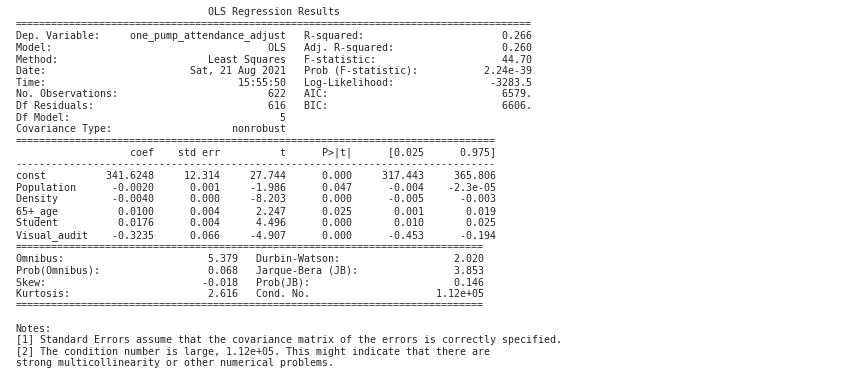

In [54]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(regressor_OLS_new.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Standard.png',dpi=300)

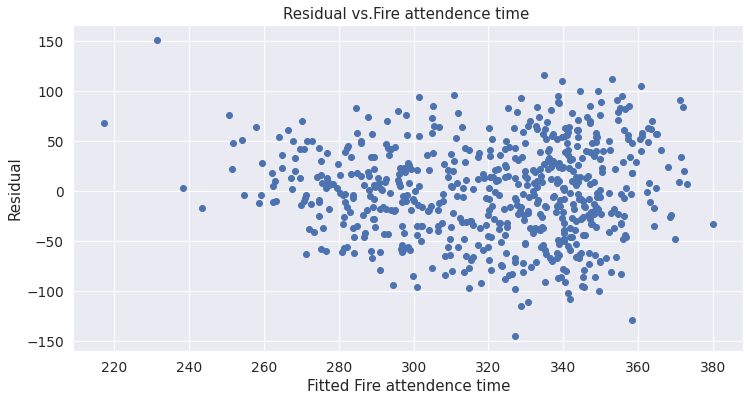

In [56]:
# plot 
plt.scatter(regressor_OLS_new.fittedvalues, regressor_OLS_new.resid)
# adding title and labels
plt.xlabel('Fitted Fire attendence time')
plt.ylabel('Residual')
plt.title('Residual vs.Fire attendence time ')
plt.show()

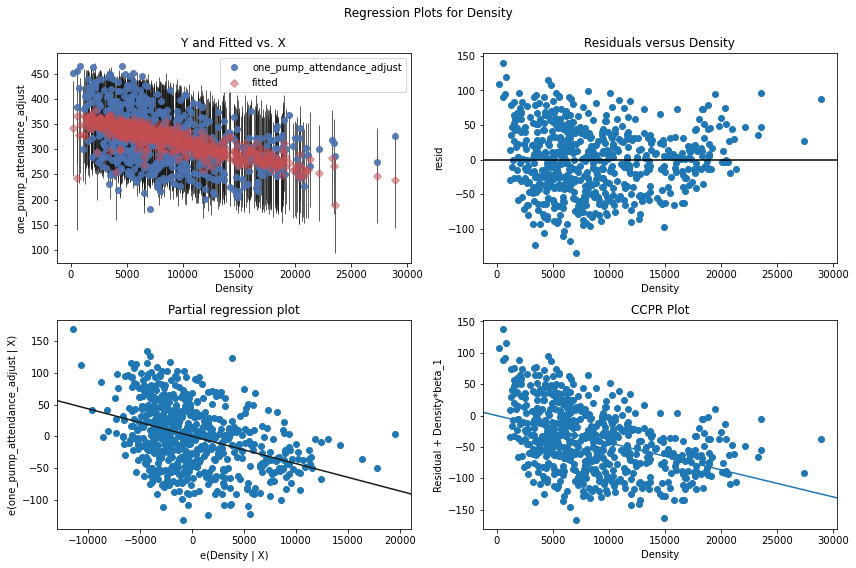

In [86]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regressor_OLS_new_new, 'Density', fig=fig)

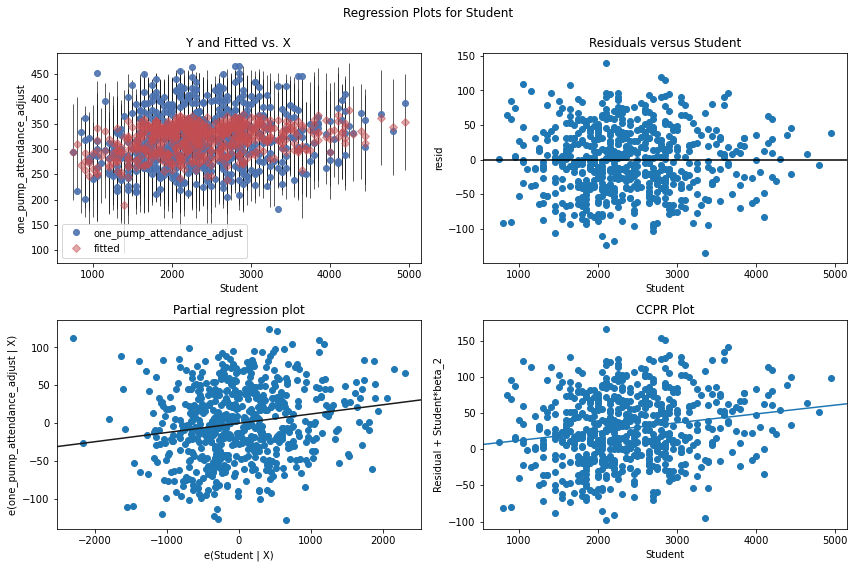

In [87]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regressor_OLS_new_new, 'Student', fig=fig)

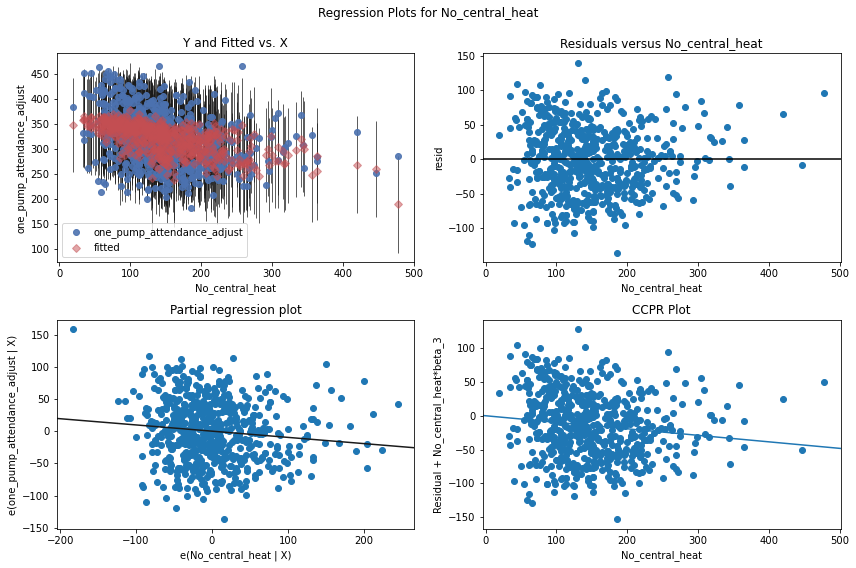

In [88]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regressor_OLS_new_new, 'No_central_heat', fig=fig)

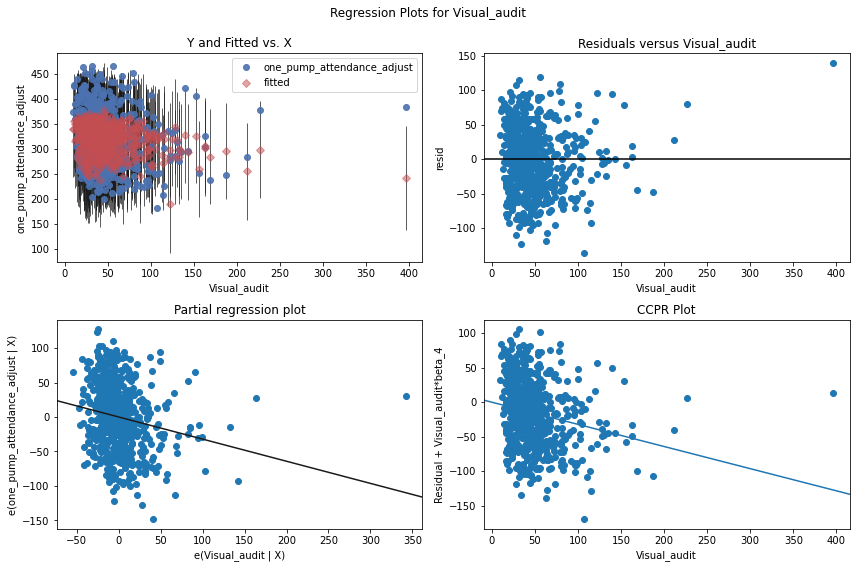

In [89]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regressor_OLS_new_new, 'Visual_audit', fig=fig)

## Lasso

In [90]:
from sklearn import linear_model
# increase the max_iter to guarantee convergence
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=predictors_datanew, y=response_datanew)

Lasso(max_iter=100000000.0, normalize=True)

In [91]:
lasso_model.score(X=predictors_datanew, y=response_datanew)

0.0

In [92]:
# print(lasso_model.coef_)
df_coef_lasso = pd.DataFrame({"var": predictors_datanew.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                var  coef
0        Population  -0.0
1           Density  -0.0
2           65+_age   0.0
3       Deprivation  -0.0
4      HR_buildings  -0.0
5          Heritage  -0.0
6    local_concerns  -0.0
7           Student   0.0
8             crime  -0.0
9     Over_crowding  -0.0
10  No_central_heat  -0.0
11      older_alone   0.0
12       Disability  -0.0
13          Smokers  -0.0
14  Fire_casualties  -0.0
15             HFSV  -0.0
16   FSR_Inspection  -0.0
17     Visual_audit  -0.0


(-1.25, 4.25, -21.822965428742854, 53.39644646075722)

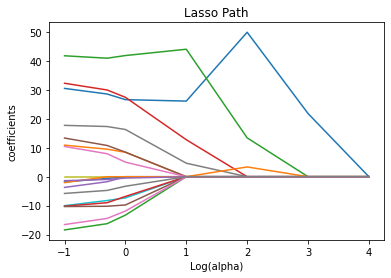

In [93]:
from itertools import cycle
from sklearn.linear_model import lasso_path

predictors_datanew_standardised = predictors_datanew/predictors_datanew.std(axis=0)

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_datanew_standardised, response_datanew.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

## Regression Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(predictors_datanew, response_datanew)

DecisionTreeRegressor(random_state=0)

In [95]:
reg_tree.score(X=predictors_datanew, y=response_datanew)

1.0

In [97]:
df.describe(include=[np.number])

,Population,Density,65+_age,Deprivation,HR_buildings,Heritage,local_concerns,Student,crime,Over_crowding,No_central_heat,older_alone,Disability,Smokers,Fire_casualties,one_pump_attendance_adjust,HFSV,FSR_Inspection,Visual_audit
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.00000,622.000000,622.000000,622.000000
mean,14262.942122,8740.077170,1660.710611,54.016077,11.260450,30.676849,14.327974,2383.681672,1281.934084,111.175241,148.173633,499.085209,503.496785,1704.385852,2.127010,320.78135,134.517685,18.869775,48.713826
std,3033.660681,5180.446894,535.698662,19.741479,28.195996,74.854298,13.705852,731.620605,1082.753421,92.159351,65.028239,148.784309,187.733835,619.230497,7.566662,55.45694,84.520980,24.766492,31.813341
min,5550.000000,191.000000,590.000000,12.000000,0.000000,0.000000,0.000000,750.000000,245.000000,5.000000,19.000000,192.000000,0.000000,504.000000,0.000000,182.00000,20.000000,0.000000,10.000000
25%,12000.000000,4900.250000,1281.000000,39.000000,1.000000,3.000000,6.000000,1900.000000,784.000000,41.000000,102.000000,397.500000,360.000000,1254.250000,0.000000,280.00000,76.250000,6.250000,29.000000
50%,14150.000000,7456.000000,1570.000000,56.000000,3.000000,9.000000,11.000000,2300.000000,1069.000000,84.500000,140.000000,472.000000,505.000000,1622.500000,1.000000,318.00000,113.500000,13.000000,41.000000
75%,16200.000000,11796.250000,1883.250000,69.000000,10.000000,28.000000,17.000000,2850.000000,1476.750000,159.750000,184.000000,584.750000,630.000000,2049.750000,2.000000,359.00000,175.750000,22.000000,57.000000
max,29700.000000,28915.000000,3750.000000,100.000000,340.000000,970.000000,176.000000,4950.000000,17244.000000,622.000000,478.000000,1079.000000,1065.000000,5639.000000,180.000000,466.00000,664.000000,354.000000,396.000000


In [100]:
ave=np.mean(df['one_pump_attendance_adjust'])
ave

320.78135048231513

## Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(random_state=0)
reg_random_forest.fit(predictors_datanew, response_datanew.values.reshape(-1))

RandomForestRegressor(random_state=0)

In [102]:
reg_random_forest.score(X=predictors_datanew, y=response_datanew)

0.901040918006954